# UX 3 Descriptive Statistics

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---
## Learning goals
After working your way through this notebook you should be able to..
- Plot and summarise numerical data by showing
  + Central Tendency
  + Variability
- Describe the distribution of data using histograms
- Explain the relationship between standard error of mean and sample size

## Table of Contents
 
- [2. Summarizing data](#Summarizing)
    + [2.1. Central Tendency](#Tendency)
    + [2.2. Variability](#variability)
- [3. Frequency Distributions](#Distributions)
    + [3.1. Normal Distribution](#Normaldist)
- [4. Sample means and sample size](#SampleMeanSize)
- [5. Standard Error of the Mean](#StandardError)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

<a id= 'Summarizing'> </a>


## 1 Summarizing data

Once we have our sample, we first want to collect, classify, summarize and present the data so we can interpret it. This is what we use descriptive statistics for. Ways of summarizing data differ depending on the type of data collected and also the spread of all data points.


<a id= 'Tendency'> </a>

### 1.1 Central tendency

The central tendency is a single value that summarizes the data. If we are to pick one value to represent all measured values this is it.

#### Arithmetic and Geometric Mean 
The most commonly used measure of central tendency is the *ARITHMETIC  MEAN* value, which is  based on ALL values (or scores). One can think of it as a kind of "balancing point". The arithmetic mean of a sample can be calculated as

$$\bar{x} =\frac {\sum_i^n{ x_i}} {N} $$

where $x_i$ is each individual score (that is $x_1, x_2, ..., x_n$)

Since all values are weighted equally, any extreme values become quite influential. 

An alternative is to use the *GEOMETRIC MEAN*, calculated as the nth root of the product between individual scores:

$$ \sqrt[n]{{ x_1}{ x_2}...{x_n}}$$

#### Median
The *MEDIAN* is also less sensitive to extreme values than the arithmetic mean. The median is the point below which half of the (numerically ordered) scores fall and is also called the 50th percentile. A downside with this is that while the median takes the middle value, it does not incorporate *all* values in doing so. 

### Try out 1: 
Calculate different measures of central tendency for 
A=[1, 1, 2, 3, 3, 3, 3, 4]

Then change A to include an extrem value and redo.

In [7]:
#uncomment and run code for different measures of central tendency 

A=[1, 1, 2, 3, 3, 3, 3, 4]

# Uncomment next line to display MEDIAN
#print('Median:') 
#print(np.median(A))

# Uncomment next line to display arithmetic MEAN
#print('Arithmetic mean:') 
# np.mean(A)

#Uncomment next line to display geometric MEAN
#print('Geometric mean:') 
# stats.gmean(A)

ANSWER: How do the three measures of central tendency change when A changes?


#### Mode

The *mode* is simply the most commonly occuring score in the data, and therefore a score always present in the data. This is used mostly for categorical (nominal) data.

### Try out 2: 
what will be the answer for this call?

In [6]:
# TRY OUT BY HAND FIRST: What will be the mode of the the following sample?
# ["red", "blue", "blue", "red", "green", "red", "red"]

# Uncomment next line to display MODE
# stats.mode(["red", "blue", "blue", "red", "green", "red", "red"])


<a id= 'variability'> </a>

### 1.2. Variability

Reporting only central tendency is a start, but it typically does not tell us much about the true
nature of the data, because it lacks information about the *variability* or
*spread* in it. The simplest way of reporting this variability is to specify the range of the data, i.e. the smallest and largest values. While this gives us some information, two variability measures that are more used are variance and standard deviation. These help us understand how closely to the central tendency  values are located.

VARIANCE is the sum of the **squared difference** between *each individual
score* and the *mean*, all divided by the *number* of scores

$$\sigma^2  =\frac{\sum_i^N{ (x_i-\bar{x}})^2 } {N}$$ 

where $x_i$ is each
individual value and $\bar{x}$ is the
arithmetic mean.
The squared difference ("sum of squares") will re-appear in some of the statistical tests later on.

STANDARD DEVIATION is simply the square root of the variance
$$\sigma  =\sqrt {\sigma^2}$$

The standard deviation can be thought of as the average distance between all individual values and the sample mean. Assuming that data is normally distributed, most of the scores can be found within this distance (68.27% of them to be more precise).

What you see above refers to the true variance and the true standard deviation of the population. For SAMPLE variance and standard deviation, the denominator is adjusted by replacing *N* by *(N-1)*. You can think of it as reducing the risk of underestimating the variance for small sample sizes (because the denominator N-1 is smaller than N, resulting in a higher calculated variance).

### Try out 3: 
Which of the following function calls calculate the sample standard deviation?

    np.std(a)
    np.std(a, ddof=1)

In [7]:
#Which of the following function calls are calculating the sample mean?
# 'ddof' Means Delta Degrees of Freedom. 
# The divisor used in calculations is N - ddof, where N represents the number of elements. 
# By default ddof is zero.

a=np.arange(1,4)
#compare the following:
print(np.std(a))
print(np.std(a, ddof=1))

# TIP look up ddof in: help(np.std)

0.816496580927726
1.0


<a id= 'Distributions'> </a>

## 2. Frequency Distributions

The central tendency and spread of the data summarize some characteristics of the sample, but to get a better overview we would like to know about the *distribution* of data points. Histograms will tell us about the shape of the distribution. There are a few shapes that can be expected to occur in different kinds of data: *NORMAL* distributions (bell shaped and symmetrical), *SKEWED* distributions (one tail longer than the other), *UNIFORM* distributions (flat), and *BIMODAL* (two main peaks).



### Try out 4: 
What kind of distribution is this? Plot the histogram for different increasing N and try to determine from the shape what type of distribution that emerges (normal, skewed, uniform or bimodal?). 

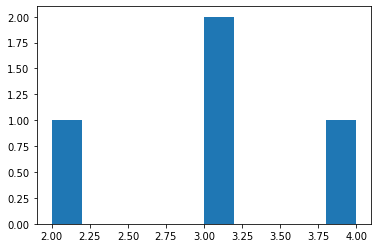

In [20]:
# Try increasing the N  to draw a larger sample
# Increase it by factors of 10 (4 - 40 - 400 - 4000 - 40000...) to see how the shape changes
N=4
scores=np.random.randint(1,6,N)
plt.hist(scores)
plt.show()

# TIP: for more info, uncomment the next line and run
# help(np.random)

<a id= 'Normaldist'> </a>

### 2.1 Normal distribution


The *Gaussian* distribution is so common that it is also called a *normal* distribution. A lot of different biological processes give rise data distributed in this fashion (e.g. heights, weights, bacteria growth...) 

The distribution is defined by the function:

$$ y(x) =\frac{1}{\sigma \sqrt{2 \pi}} e^-{\frac{(x-\mu)^2}{2\sigma^2}}$$ 

where $\sigma$ is the standard devaiation and $\mu$ is the
arithmetic mean. Since normal distributions are perfectly symmetrical, the mean, median and mode are the same. Note that we here use *Greek* letters to denote the *TRUE* mean $\mu$ and standard deviation $\sigma$ of the population (as opposed to the *SAMPLE* mean $\bar{x}$ and SAMPLE standard deviation $s$).

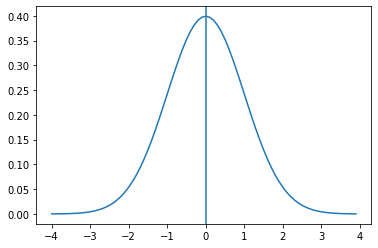

In [ ]:
# Plot a standard normal distribution where:
# Standard deviation (sigma) = 1 
# Mean (mu) = 0

# Generate an x-vector
x = np.arange(-4, 4, 0.1)

sigma1 = 1
mu1 = 0

# Calculate a normal distribution of x with a mean of 0 
y1 =1/(sigma1* np.sqrt(2*np.pi))*np.exp(-((x-mu1)**2)/(2 * sigma1**2))

plt.plot(x,y1)

# Plot the mean value as vertical line
plt.axvline(mu1, 0, 1) 
plt.show()

### Try out 5: 
Plot the normal distribution with different mean and std. What changes in the plot?

In [ ]:
#Copy and modify the code above to plot the normal distribution again 
#But now with different values for mean and std.
# What changes in the plot?


In a normal distribution, the majority of scores lie around the centre (main peak) of the distribution. The width of the bell says something about the variability of data, specifically how well-centered it is around the mean value. In fact, as seen in the equation above, the width is linked to the standard deviation. 68.26 % of all values can be found in the region $\mu \pm \sigma$. If we increase the range to $\mu \pm 2\sigma$, we account for almost ALL values, 96.44%.

An example of normally distributed data can be seen in human height: 
https://ourworldindata.org/human-height#height-is-normally-distributed


We can simulate drawing a sample measuring heights

### Try out 6: 
Look at the code and histogram in the below code. What is the mean and the standard deviation for this distribution?

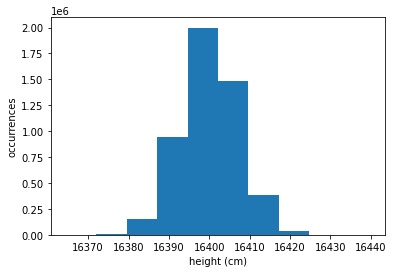

In [24]:
# What is the mean and the standard deviation for this distribution

# Variable for sample size
N = 50

# Variable for sample values
sampleheights=np.random.normal(164,7,N)

plt.hist(sampleheights)
plt.ylabel('occurrences')
plt.xlabel('height (cm)')
plt.show()

### Try out 7: 
Go to the link on human heights https://ourworldindata.org/human-height#height-is-normally-distributed and find the mean and standard deviation values for of the opposite sex.
Copy the code above and insert these values so that they correspond to samples of the opposite sex.

In [ ]:
#Copy the random sampling code above and insert the values from human height data
#so that they correspond to samples of the opposite sex



<a id= 'SampleMeanSize'> </a>

## 3. Sample mean and sample size

We draw samples because it is impractical (or impossible) to measure all individuals in the whole population. We therefore need also to consider how large a sample is needed for our sample mean $\bar{x}$ to be a good estimate of the true population mean $\mu$. 
As our sample size N increases it will start to approach the whole population, so the immediate answer is the larger the better. The reason for this we can see in the variability of sample means. Practically, however, larger samples cost resources and we will later return to what determines a reasonable N.

We can investigate how the sample means vary in relation to the true population mean $\mu$ by simulating samples from a normally distributed population. By repeatedly drawing means of a sample size N, calculating their respective sample means, and plotting these, we can see how they differ.

### Try out 8: 
Draw different samples, each with a sample size N. Then extend the code to add means for all samples and plot the histogram of the resulting scores. 

Compare to the true mean of the population (the one we send to the random-function). 

Repeat for different Ns.

In [26]:
# draw different samples, each with a sample size N. 

N=5 #variable for sample size
sample1=np.random.normal(164,7,N)
sample2=np.random.normal(164,7,N)
sample3=np.random.normal(164,7,N)
sample4=np.random.normal(164,7,N)
sample5=np.random.normal(164,7,N)

# extend this to add means for all samples
allmeans= [np.mean(sample1), np.mean(sample2)]

#Add code to plot the histogram of the resulting scores.

#compare to the true mean of the population

#Repeat for different Ns

<a id= 'StandardError'> </a>

## 4. Standard Error of the Mean

The estimate of the true population mean vary among the samples drawn from the population. As we collect more and more samples it becomes clear that **the sample means *themselves* form a distribution with some variability**. If the sample size N is large enough, most sample means will be close to the true population mean. That is the standard deviation of the sample means distribution is small.

The standard deviation of the sample means distribution is called *standard error of the mean* and it serves as a measure of how precise our estimation of the true mean is. 

The effect of sample size on standard error of the mean can be seen by drawing K samples, each of size N, calculating sample means and plot them.

Standard error= 6.556780389571192
Standard error= 4.167995715668313
Standard error= 3.379792985671171


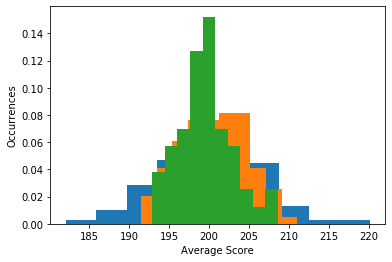

In [10]:
# The effect of sample size on standard error of the mean can be seen 
# by drawing K samples, each of size N, calculating sample means and plot them. 

# K is the number of samples we draw
K = 100 

# N contains the sample sizes we are comparing
N=[10, 20, 30]

# Initialize an array for the sample means
meanarr=np.zeros(K, float)

for i in range(0,len(N)):                                   # For each sample size...
    for j in range(0,K):                                    # For each individual sample of that size...
       score=np.random.normal(200,20,N[i])                  # Generate normally-distributed sample vector
       meanarr[j]=score.mean()                              # calculate the sample mean 
    count, bins, ignored =plt.hist(meanarr, density=True)   # plot histogram with K means (corresponding to one sample size)
    print('Standard error=', meanarr.std())                 # print the standard error for each sample size

plt.ylabel('Occurrences')
plt.xlabel('Average Score')
plt.show()

# The plot shows that the larger samples have means that closer to the true population mean
# Hence they have a higher peak, with lower standard deviation (bell width)

### Try out 9: 
Change the number of samples drawn (K) in the code above and see how the distribution changes.

In [ ]:
# Copy the code above but change the number of samples drawn K and see how the distribution changes



### Try out 10: 
Add additional sample sizes in the array for N and see the effect of the standard error.

In [ ]:
# Copy the code above but add additional sample sizes for N and see the effect of the standard error

ANSWER: How does the standard error of the mean change with larger N and K? How does this relate to the histogram of the means?